<a href="https://colab.research.google.com/github/imaleaf03/btl/blob/main/btl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time

In [ ]:
data = pd.read_csv('full_data.csv')
data

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
59349,2020-11-25,Zimbabwe,90.0,1.0,9398.0,274.0,453.0,14.0,788.0,19.0
59350,2020-11-26,Zimbabwe,110.0,0.0,9508.0,274.0,527.0,13.0,841.0,19.0
59351,2020-11-27,Zimbabwe,115.0,0.0,9623.0,274.0,577.0,9.0,927.0,19.0
59352,2020-11-28,Zimbabwe,91.0,1.0,9714.0,275.0,594.0,10.0,949.0,18.0


In [ ]:
data.dropna(subset=['new_cases', 'new_deaths', 'total_cases', 'total_deaths',
                    'weekly_cases', 'weekly_deaths', 'biweekly_cases', 'biweekly_deaths'], inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.drop_duplicates()
data = data.astype({'new_cases': int, 'new_deaths': int, 'total_cases': int, 'total_deaths': int,
                    'weekly_cases': int, 'weekly_deaths': int, 'biweekly_cases': int, 'biweekly_deaths': int})


In [ ]:
data

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-03-24,Afghanistan,6,1,40,1,19,1,36,1
1,2020-03-25,Afghanistan,2,0,42,1,20,1,35,1
2,2020-03-26,Afghanistan,33,0,75,1,53,1,68,1
3,2020-03-27,Afghanistan,0,0,75,1,53,1,68,1
4,2020-03-28,Afghanistan,16,1,91,2,67,2,84,2
...,...,...,...,...,...,...,...,...,...,...
46116,2020-11-25,Zimbabwe,90,1,9398,274,453,14,788,19
46117,2020-11-26,Zimbabwe,110,0,9508,274,527,13,841,19
46118,2020-11-27,Zimbabwe,115,0,9623,274,577,9,927,19
46119,2020-11-28,Zimbabwe,91,1,9714,275,594,10,949,18


In [ ]:
features = ['total_cases', 'total_deaths', 'weekly_cases', 'weekly_deaths', 'biweekly_cases', 'biweekly_deaths']
target = 'new_cases'
data = data.dropna(subset=[target] + features)
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ln_r2 = r2_score(y_test, y_pred)
ln_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ln_mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", ln_rmse)
print("Mean Absolute Error (MAE):", ln_mae)
print("R^2 Score:", ln_r2)

Root Mean Squared Error (RMSE): 2042.5908236977007
Mean Absolute Error (MAE): 312.7531072175813
R^2 Score: 0.9931995385560037


In [ ]:
start_time = time.time()
model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
dt_r2 = r2_score(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", dt_rmse)
print("Mean Absolute Error (MAE):", dt_mae)
print("R^2 Score:", dt_r2)
end_time = time.time()
runtime = end_time - start_time
print("Runtime: ", runtime)

Root Mean Squared Error (RMSE): 2154.5934252428683
Mean Absolute Error (MAE): 441.1381384709429
R^2 Score: 0.9869163495500305
Runtime:  0.10509634017944336


In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R^2 Score:", rf_r2)

Root Mean Squared Error (RMSE): 1907.0321456492168
Mean Absolute Error (MAE): 388.5896305587294
R^2 Score: 0.9897502257617966


In [ ]:
features = ['total_cases', 'total_deaths', 'weekly_cases', 'weekly_deaths', 'biweekly_cases', 'biweekly_deaths']
target = 'new_cases'
data = data.dropna(subset=[target] + features)
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error:", rf_mse)
print("R^2 Score:", rf_r2)

Root Mean Squared Error (RMSE): 7445.429918636128
Mean Absolute Error (MAE): 638.4668123969411
Mean Squared Error: 55434426.67332198
R^2 Score: 0.8940337071284752


In [ ]:
features = ['total_cases', 'total_deaths', 'weekly_cases', 'weekly_deaths', 'biweekly_cases', 'biweekly_deaths']
target = 'new_deaths'
data = data.dropna(subset=[target] + features)
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ln_r2 = r2_score(y_test, y_pred)
ln_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ln_mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", ln_rmse)
print("Mean Absolute Error (MAE):", ln_mae)
print("R^2 Score:", ln_r2)

Root Mean Squared Error (RMSE): 104.01311480263702
Mean Absolute Error (MAE): 14.510570303714216
R^2 Score: 0.947093199132332


In [ ]:
model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
dt_r2 = r2_score(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", dt_rmse)
print("Mean Absolute Error (MAE):", dt_mae)
print("R^2 Score:", dt_r2)

Root Mean Squared Error (RMSE): 115.82674580593947
Mean Absolute Error (MAE): 18.410899129263193
R^2 Score: 0.934392572786414


In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R^2 Score:", rf_r2)

Root Mean Squared Error (RMSE): 110.64195307391178
Mean Absolute Error (MAE): 16.224968613059524
R^2 Score: 0.9401347274006363


<ipython-input-121-d8e9736a2e5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


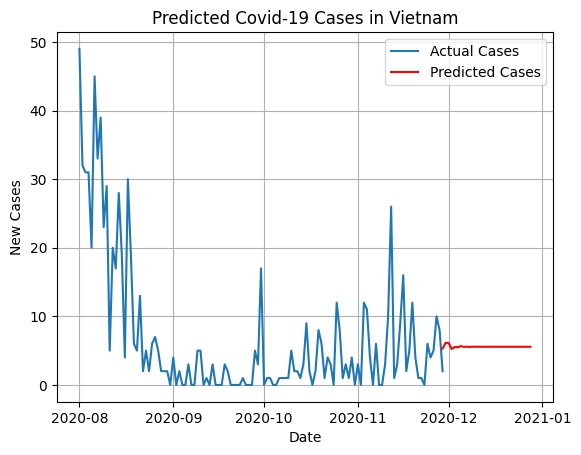

In [ ]:
country_data = data[data['location'] == 'Vietnam']
country_data['date'] = pd.to_datetime(country_data['date'])
country_data.set_index('date', inplace=True)
cases_data = country_data['new_cases']

model = ARIMA(cases_data, order=(5,1,0))
model_fit = model.fit()
future_predictions = model_fit.forecast(steps=30)
plt.plot(cases_data.index, cases_data.values, label='Actual Cases')
plt.plot(pd.date_range(start=cases_data.index[-1], periods=30, freq='D'), future_predictions, label='Predicted Cases', color='red')
plt.title('Predicted Covid-19 Cases in Vietnam')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-110-a0c91b0e0836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['date'] = pd.to_datetime(us_data['date'])
<ipython-input-110-a0c91b0e0836>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['weekly_date'] = us_data['date'].dt.to_period('W')


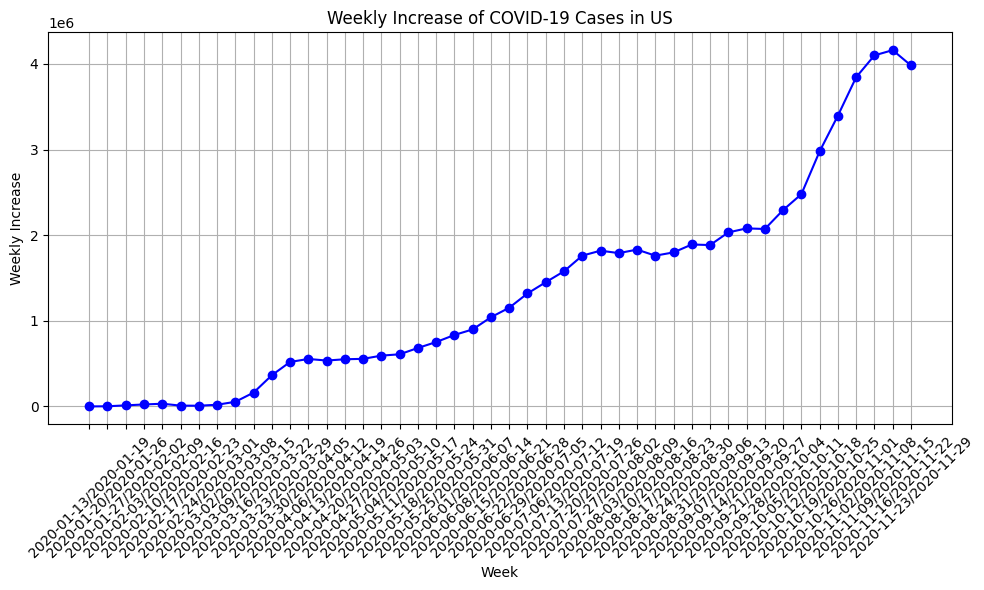

In [ ]:
us_data = data[(data['location'] == 'World') ]
us_data['date'] = pd.to_datetime(us_data['date'])
us_data['weekly_date'] = us_data['date'].dt.to_period('W')
weekly_increase_us = us_data.groupby('weekly_date')['new_cases'].sum()
plt.figure(figsize=(10, 6))
plt.plot(weekly_increase_us.index.astype(str), weekly_increase_us.values, marker='o', linestyle='-', color='blue')
plt.title('Weekly Increase of COVID-19 Cases in US')
plt.xlabel('Week')
plt.ylabel('Weekly Increase')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-109-cd47a6f9d7dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['date'] = pd.to_datetime(us_data['date'])
<ipython-input-109-cd47a6f9d7dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['weekly_date'] = us_data['date'].dt.to_period('W')


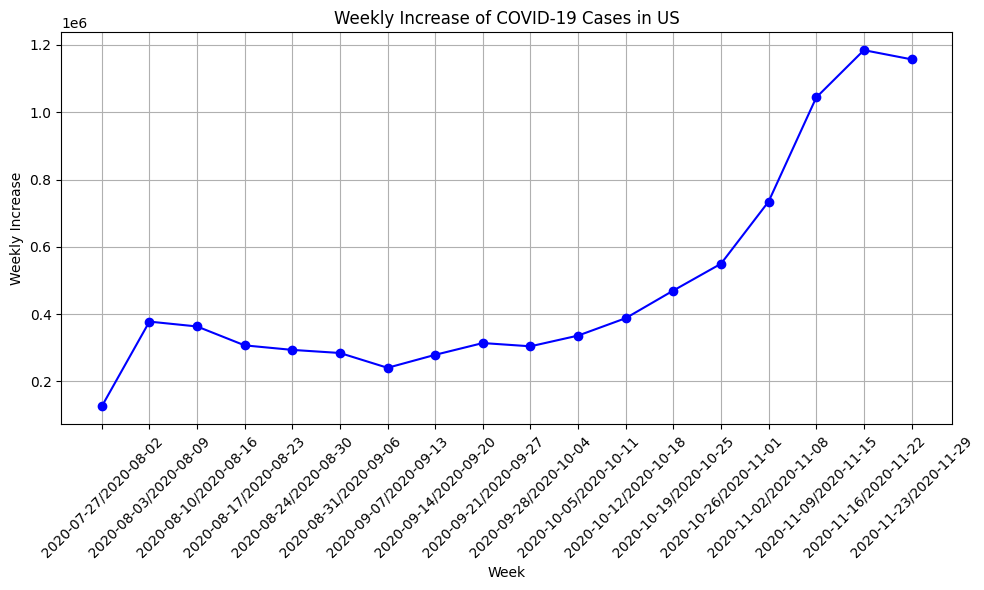

In [ ]:
us_data = data[(data['location'] == 'United States') & (data['date'] >= '2020-08-01') & (data['date'] <= '2020-12-31')]
us_data['date'] = pd.to_datetime(us_data['date'])
us_data['weekly_date'] = us_data['date'].dt.to_period('W')
weekly_increase_us = us_data.groupby('weekly_date')['new_cases'].sum()

plt.figure(figsize=(10, 6))
plt.plot(weekly_increase_us.index.astype(str), weekly_increase_us.values, marker='o', linestyle='-', color='blue')
plt.title('Weekly Increase of COVID-19 Cases in US')
plt.xlabel('Week')
plt.ylabel('Weekly Increase')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-120-db2726fed06e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])  # Chuyển đổi cột 'date' sang kiểu datetime
<ipython-input-120-db2726fed06e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_data['weekly_date'] = vietnam_data['date'].dt.to_period('W')  # Tính toán ngày theo tuần


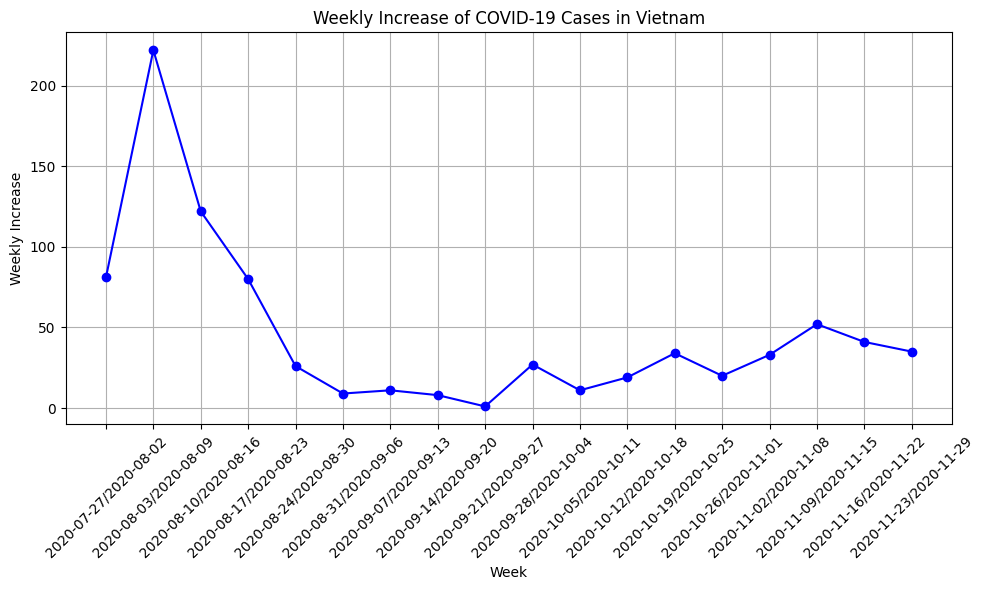

In [ ]:
vietnam_data = data[data['location'] == 'Vietnam']
vietnam_data['date'] = pd.to_datetime(vietnam_data['date'])
vietnam_data['weekly_date'] = vietnam_data['date'].dt.to_period('W')
weekly_increase = vietnam_data.groupby('weekly_date')['new_cases'].sum()

plt.figure(figsize=(10, 6))
plt.plot(weekly_increase.index.astype(str), weekly_increase.values, marker='o', linestyle='-', color='blue')
plt.title('Weekly Increase of COVID-19 Cases in Vietnam')
plt.xlabel('Week')
plt.ylabel('Weekly Increase')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
total_cases_by_location = data.groupby('location')['total_cases'].max().sum()
total_deaths_by_location = data.groupby('location')['total_deaths'].max().sum()

print("Tổng số ca nhiễm:", total_cases_by_location)
print("Tổng số ca tử vong:", total_deaths_by_location)

Tổng số ca nhiễm: 124537743
Tổng số ca tử vong: 2907194


In [ ]:
summary_data = data.groupby('location').agg({
    'total_cases': 'max',
    'total_deaths': 'max'
}).reset_index()
summary_data

,location,total_cases,total_deaths
0,Afghanistan,45844.0,1763.0
1,Albania,36790.0,787.0
2,Algeria,81212.0,2393.0
3,Andorra,6670.0,76.0
4,Angola,15087.0,345.0
...,...,...,...
189,Western Sahara,766.0,1.0
190,World,62271031.0,1453531.0
191,Yemen,2160.0,615.0
192,Zambia,17589.0,357.0


In [ ]:
data['daily_cases'] = data.groupby('location')['new_cases'].diff().fillna(0)
data['daily_deaths'] = data.groupby('location')['new_deaths'].diff().fillna(0)
data[['date', 'location', 'daily_cases', 'daily_deaths']]

,date,location,daily_cases,daily_deaths
0,2020-03-24,Afghanistan,0.0,0.0
1,2020-03-25,Afghanistan,-4.0,-1.0
2,2020-03-26,Afghanistan,31.0,0.0
3,2020-03-27,Afghanistan,-33.0,0.0
4,2020-03-28,Afghanistan,16.0,1.0
...,...,...,...,...
46409,2020-11-25,Zimbabwe,2.0,-4.0
46410,2020-11-26,Zimbabwe,20.0,-1.0
46411,2020-11-27,Zimbabwe,5.0,0.0
46412,2020-11-28,Zimbabwe,-24.0,1.0


In [ ]:
worlddata = data[data['location'] != 'World']
total_cases_by_location = worlddata.groupby('location')['total_cases'].max().sum()
total_deaths_by_location = worlddata.groupby('location')['total_deaths'].max().sum()
print("Tổng số ca nhiễm:", total_cases_by_location)
print("Tổng số ca tử vong:", total_deaths_by_location)

Tổng số ca nhiễm: 62266712
Tổng số ca tử vong: 1453663


In [ ]:
world_data = data[data['location'] == 'World']
total_cases_world = world_data['total_cases'].max()
total_deaths_world = world_data['total_deaths'].max()

print("Tổng số ca nhiễm bệnh", total_cases_world)
print("Tổng số ca tử vong", total_deaths_world)

Tổng số ca nhiễm bệnh 62271031
Tổng số ca tử vong 1453531


In [ ]:
data['daily_cases'] = data.groupby('location')['new_cases'].diff().fillna(0)
data['daily_deaths'] = data.groupby('location')['new_deaths'].diff().fillna(0)
data[['date', 'location', 'daily_cases', 'daily_deaths']].head(10)
top_locations = data.groupby('location').head(3)
top_locations[['date', 'location', 'daily_cases', 'daily_deaths']].head(15)

,date,location,daily_cases,daily_deaths
0,2020-03-24,Afghanistan,0.0,0.0
1,2020-03-25,Afghanistan,-4.0,-1.0
2,2020-03-26,Afghanistan,31.0,0.0
251,2020-03-22,Albania,0.0,0.0
252,2020-03-23,Albania,7.0,0.0
253,2020-03-24,Albania,-2.0,2.0
504,2020-03-13,Algeria,0.0,0.0
505,2020-03-14,Algeria,-4.0,0.0
506,2020-03-15,Algeria,10.0,-1.0
765,2020-03-27,Andorra,0.0,0.0


In [ ]:
data.groupby('location').sum()

<ipython-input-65-793a90bb1686>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('location').sum()


,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,daily_cases,daily_deaths,daily_increase_cases
location,,,,,,,,,,,
Afghanistan,45810,1763,6874961,231250,317085,12121,624617,23681,222.0,10.0,222.0
Albania,36720,785,2110730,54902,243811,5194,453229,9742,539.0,16.0,317.0
Algeria,81192,2393,7453343,289344,538700,16191,1026561,31494,2097.0,40.0,1557.0
Andorra,6482,76,438383,12860,44317,532,86396,1064,24.0,-3.0,-2042.0
Angola,15079,343,777301,23785,102359,2357,197996,4634,266.0,5.0,206.0
...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,760,1,114268,184,5320,7,10640,14,-17.0,-1.0,-2.0
World,62270972,1453530,5220875144,168971738,423696800,9954316,818736482,19415356,552295.0,9189.0,552296.0
Yemen,2154,615,314124,89039,14877,4278,29438,8518,12.0,-1.0,-552284.0


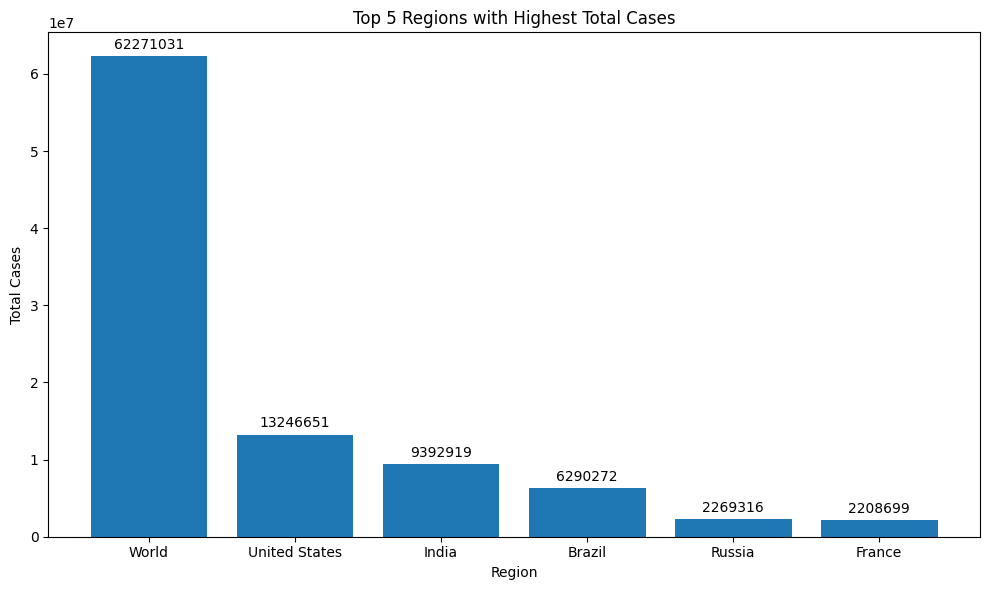

In [ ]:
data_by_region = data.groupby('location')['total_cases'].max()
top_regions = data_by_region.sort_values(ascending=False).head(6)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_regions.index, top_regions.values)
plt.title('Top 5 Regions with Highest Total Cases')
plt.xlabel('Region')
plt.ylabel('Total Cases')
plt.xticks(rotation=0)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


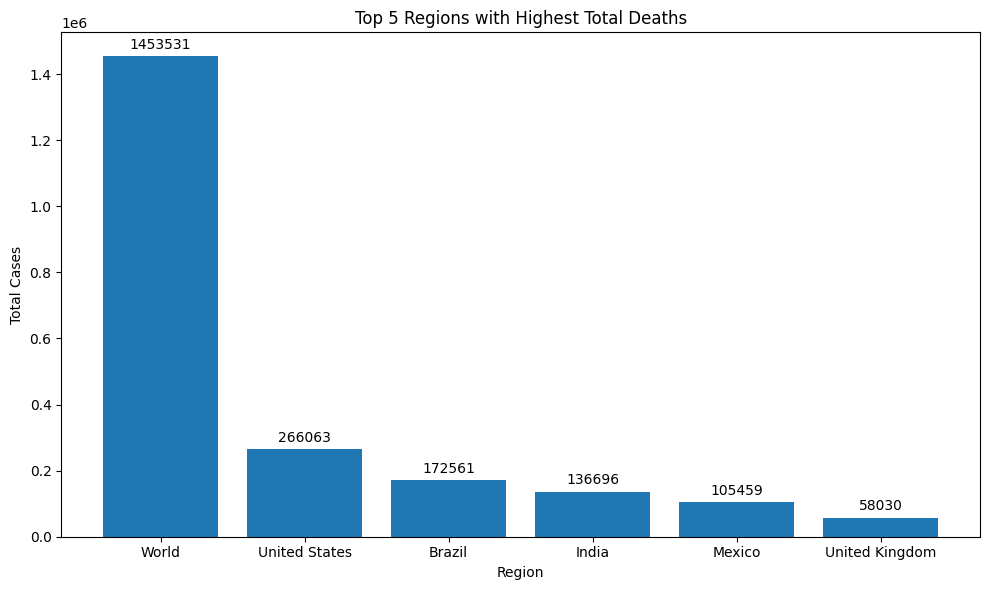

In [ ]:
data_by_region = data.groupby('location')['total_deaths'].max()
top_regions = data_by_region.sort_values(ascending=False).head(6)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_regions.index, top_regions.values)
plt.title('Top 5 Regions with Highest Total Deaths')
plt.xlabel('Region')
plt.ylabel('Total Cases')
plt.xticks(rotation=0)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


<ipython-input-15-15c58cf00739>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation  = data.corr()


                 new_cases  new_deaths  total_cases  total_deaths  \
new_cases         1.000000    0.891139     0.968673      0.966642   
new_deaths        0.891139    1.000000     0.819541      0.876333   
total_cases       0.968673    0.819541     1.000000      0.973866   
total_deaths      0.966642    0.876333     0.973866      1.000000   
weekly_cases      0.994534    0.885366     0.974733      0.971721   
weekly_deaths     0.896882    0.974689     0.837508      0.899197   
biweekly_cases    0.992815    0.886190     0.976389      0.972995   
biweekly_deaths   0.892583    0.968866     0.836466      0.902555   

                 weekly_cases  weekly_deaths  biweekly_cases  biweekly_deaths  
new_cases            0.994534       0.896882        0.992815         0.892583  
new_deaths           0.885366       0.974689        0.886190         0.968866  
total_cases          0.974733       0.837508        0.976389         0.836466  
total_deaths         0.971721       0.899197        0.9729

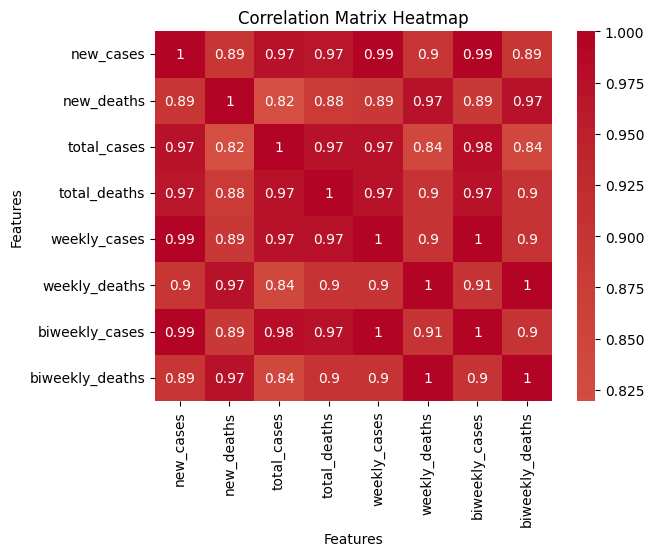

In [ ]:
correlation  = data.corr()
print(correlation)
#plt.figure(figsize=(15, 15))
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()